# Titanic survived Project
#### Project Description
#### The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### Attribute Information
1. Passenger id- Unique Id of the passenger
2. Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Survived- Survived (0 = No; 1 = Yes)
4. Name- Name of the passenger
5. Sex- Sex of the passenger (Male, Female)
6. Age- Age of the passenger
7. Sibsp- Number of Siblings/Spouses Aboard
8. Parch- Number of Parents/Children Aboard
9. Ticket- Ticket Number
10. Fare- Passenger Fare (British pound)
11. Cabin- Cabin
12. Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
### https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked column Null values are present

In [55]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
df['Sex']= df['Sex'].replace({'male':0, 'female':1})

df['Embarked']= df['Embarked'].replace({'C':0, 'S':1, 'Q':2})

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0.0


In [59]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.897638
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.515181
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [60]:
age_missing = df[df['Age'].isna() & df.Pclass.isin([1])]
age_missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,0.0
55,56,1,1,"Woolner, Mr. Hugh",0,NaN,0,0,19947,35.5000,C52,1.0
64,65,0,1,"Stewart, Mr. Albert A",0,NaN,0,0,PC 17605,27.7208,NaN,0.0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",1,NaN,0,1,113505,55.0000,E33,1.0
168,169,0,1,"Baumann, Mr. John D",0,NaN,0,0,PC 17318,25.9250,NaN,1.0
185,186,0,1,"Rood, Mr. Hugh Roscoe",0,NaN,0,0,113767,50.0000,A32,1.0
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",1,NaN,0,0,PC 17585,79.2000,NaN,0.0
270,271,0,1,"Cairns, Mr. Alexander",0,NaN,0,0,113798,31.0000,NaN,1.0
284,285,0,1,"Smith, Mr. Richard William",0,NaN,0,0,113056,26.0000,A19,1.0
295,296,0,1,"Lewy, Mr. Ervin G",0,NaN,0,0,PC 17612,27.7208,NaN,0.0


In [61]:
df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [47]:
#df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())


#df['Title'].value_counts()

#### we can see that Mr. Miss. Mrs. Master are main titles of Name column , and other titles are merged in this main titles. 

In [46]:
#df['Title'] = df['Title'].replace('Mlle', 'Miss')

#df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')

#df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') & (df.Title !=  'Mrs')] = 'Others'


# inspect the correlation between Title and Survived
#df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [45]:
#Now we can use dummy variables for these titles and drop the original names

#df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)

In [62]:
df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [63]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [64]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [65]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [66]:
df.Ticket.head(30)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
Name: Ticket, dtype: object

In [67]:
df.Ticket = df.Ticket.map(lambda x:x[0])


df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [68]:
df['Ticket'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

In [69]:
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,62.126797
1,2,19.903349
2,3,15.969611
3,4,15.893770
4,5,19.262500
5,6,14.711817
6,7,9.367133
7,8,8.397900
8,9,7.750000
9,A,9.975286


#### divide the standard deviation by the mean. A lower ratio means a tighter 
#### distribution of Fare in each Ticket type

In [70]:
df[['Ticket', 'Fare']].groupby(['Ticket']).std() /  df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,0.795918
2,1.337386
3,1.271136
4,0.519038
5,0.284367
6,0.569208
7,0.076267
8,0.005961
9,NaN


In [71]:
# inspect the correlation between Pclass and Fare
df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [72]:
df[['Pclass', 'Fare']].groupby(['Pclass']).std() / df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,0.931385
2,0.649370
3,0.861255


In [73]:
df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,62.126797
2,19.903349
3,15.969611
4,15.893770
5,19.262500
6,14.711817
7,9.367133
8,8.397900
9,7.750000


In [74]:
df[['Ticket', 'Fare']].groupby(['Ticket']).std() /  df[['Ticket', 'Fare']].groupby(['Ticket']).mean()

,Fare
Ticket,
1,0.795918
2,1.337386
3,1.271136
4,0.519038
5,0.284367
6,0.569208
7,0.076267
8,0.005961
9,NaN


In [75]:
df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
0.0,59.954144
1.0,27.079812
2.0,13.276030


In [76]:
df[['Embarked', 'Fare']].groupby(['Embarked']).std() /  df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
0.0,1.399620
1.0,1.325267
2.0,1.068697


#### Fare has correlation with these three features. I will guess the missing value using the median value of Pcalss = 3 & Ticket = 3 & Embarked = S

In [77]:
Fare_new = df.Fare.loc[ (df.Ticket == '3') & (df.Pclass == 3) & (df.Embarked == 'S')].median()
df.Fare.fillna(Fare_new , inplace=True)


df[['Fare', 'Survived']].groupby(['Survived'],as_index=False).mean()

,Survived,Fare
0,0,22.117887
1,1,48.395408


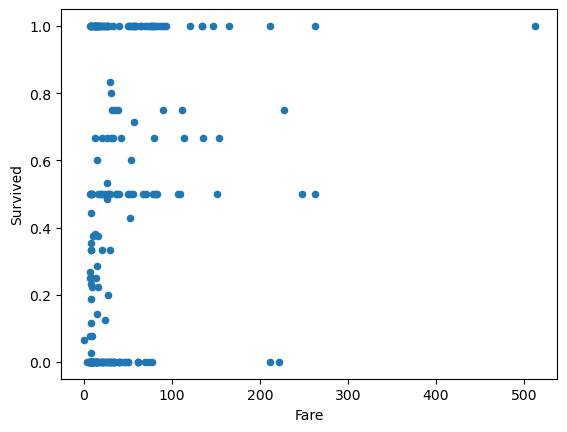

In [78]:
df[['Fare', 'Survived']].groupby(['Fare'],as_index=False).mean().plot.scatter('Fare', 'Survived')
plt.show()

In [79]:
df['Age'].fillna(value=df['Age'].mean(),  inplace=True)

In [80]:
df['Embarked'].fillna(value=df['Embarked'].mean(),  inplace=True)

In [81]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [82]:
df = df.drop(labels=['Cabin'], axis=1)

In [83]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.897638
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.514601
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Model

In [85]:
x = df.drop([('Survived'),('Name'), ('Ticket'),('PassengerId')], axis=1)
y = df['Survived']

In [86]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [87]:
x_scaled.shape[1]

7

In [88]:
# finding variance inflaction factor in each scaled column i.e   x_scaled.shape[1]  (1/(1-R^2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [90]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor (x_scaled, i) for i in range
             (x_scaled.shape[1])]

vif['Features'] = x.columns

vif

,vif,Features
0,1.742272,Pclass
1,1.102262,Sex
2,1.211301,Age
3,1.278227,SibSp
4,1.316609,Parch
5,1.617991,Fare
6,1.131978,Embarked


### All the VIF values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [91]:
x_train, x_test,y_train,  y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 349)

In [92]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [93]:
y_pred = log_reg.predict(x_test)

In [94]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [95]:
log_reg.predict_proba(x_test)

array([[0.95387815, 0.04612185],
       [0.02915761, 0.97084239],
       [0.63175205, 0.36824795],
       [0.03480099, 0.96519901],
       [0.91498828, 0.08501172],
       [0.8968688 , 0.1031312 ],
       [0.75172532, 0.24827468],
       [0.67982984, 0.32017016],
       [0.9131975 , 0.0868025 ],
       [0.71063207, 0.28936793],
       [0.87297435, 0.12702565],
       [0.88616091, 0.11383909],
       [0.03730662, 0.96269338],
       [0.76853045, 0.23146955],
       [0.74796762, 0.25203238],
       [0.78044694, 0.21955306],
       [0.8271279 , 0.1728721 ],
       [0.5652955 , 0.4347045 ],
       [0.81420032, 0.18579968],
       [0.04466518, 0.95533482],
       [0.72434661, 0.27565339],
       [0.38703238, 0.61296762],
       [0.18099448, 0.81900552],
       [0.91715225, 0.08284775],
       [0.02378399, 0.97621601],
       [0.83842082, 0.16157918],
       [0.64108304, 0.35891696],
       [0.89713955, 0.10286045],
       [0.5629538 , 0.4370462 ],
       [0.9241909 , 0.0758091 ],
       [0.

# Model Accuracy

In [96]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7802690582959642

In [97]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[121,  24],
       [ 25,  53]], dtype=int64)

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       145
           1       0.69      0.68      0.68        78

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



## KNN model

In [100]:
# write one fuction and call as many as times to check accuracy_score of different models.

def metric_score (clf, x_train, x_test, y_train, y_test, train = True ):
    if train :
        y_pred = clf.predict(x_train)
        
        print("\n ____________TRAIN RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_train, y_pred) * 100:.2f}%")
   
    
    elif train == False:
        
        pred = clf.predict(x_test)
 
        print("\n ____________TEST RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_test, pred) * 100:.2f}%")
    
        print('\n\n TEST CLASSIFICATION REPORT\n', classification_report(y_test, pred, digits=2))  #model confidence/accuracy
    


In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
# initiate KNeighborsClassifier

knn = KNeighborsClassifier()

# model training

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [103]:
# call the fuction and pass dataset to check train and test score

metric_score (knn, x_train, x_test, y_train, y_test, train = True)  # this is for training score

metric_score (knn, x_train, x_test, y_train, y_test, train = False)  # this is for testing score


 ____________TRAIN RESULT______________
Accuracy Score : 86.98%

 ____________TEST RESULT______________
Accuracy Score : 78.48%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.67      0.74      0.71        78

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.79       223



# Cross validation

In [104]:
# cross validation score to chek if the model is overfitting.

from sklearn.model_selection import cross_val_score

cross_val_score(knn,x_scaled, y, cv=5 )

cross_val_score(knn,x_scaled, y, cv=5).mean()

0.8092272926997677

## Hyperparameter tunning

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = {'algorithm' : ['kd_tree', 'brute'],
             'leaf_size' : [3,5,6,7,8],
             'n_neighbors' : [3,5,7,9,11,13]}

In [107]:
gridsearch = GridSearchCV(estimator = knn, param_grid = param_grid)

In [108]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [109]:
gridsearch.best_score_

0.8233756031870723

In [110]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [111]:
# now we will use this best parameter in knn algorithm and check if accuracy is increasing,

knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [112]:
# call the fuction and pass dataset to check train and test score

metric_score (knn, x_train, x_test, y_train, y_test, train = True)  # this is for training score

metric_score (knn, x_train, x_test, y_train, y_test, train = False)  # this is for testing score


 ____________TRAIN RESULT______________
Accuracy Score : 84.13%

 ____________TEST RESULT______________
Accuracy Score : 80.72%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       145
           1       0.73      0.72      0.72        78

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [113]:
# if you want to check type1 and type2 error using cunfusion matrix 
# we required this error as low as possible

y_pred = knn.predict(x_test)

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[124,  21],
       [ 22,  56]], dtype=int64)

## Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [115]:
# write one fuction and call as many as times to check accuracy_score of different models.

def metric_score (clf, x_train, x_test, y_train, y_test, train = True ):
    if train :
        y_pred = clf.predict(x_train)
        
        print("\n ____________TRAIN RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_train, y_pred) * 100:.2f}%")
   
    
    elif train == False:
        
        pred = clf.predict(x_test)
 
        print("\n ____________TEST RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_test, pred) * 100:.2f}%")
    
        print('\n\n TEST CLASSIFICATION REPORT\n', classification_report(y_test, pred, digits=2))  #model confidence/accuracy
    

In [116]:
# model initiation

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [117]:
# call the fuction and pass dataset to check train and test score

metric_score (clf, x_train, x_test, y_train, y_test, train = True)  # this is for training score

metric_score (clf, x_train, x_test, y_train, y_test, train = False)  # this is for testing score


 ____________TRAIN RESULT______________
Accuracy Score : 98.50%

 ____________TEST RESULT______________
Accuracy Score : 79.82%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       145
           1       0.69      0.76      0.72        78

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.80      0.80       223



In [118]:
# if you want to check type1 and type2 error using cunfusion matrix 
# we required this error as low as possible

y_pred = clf.predict(x_test)

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[119,  26],
       [ 19,  59]], dtype=int64)

In [119]:
# We are tunnig four Imortant Hyperparameters right now, we are passing the different values for both parameters.

param_grid = {
            'criterion':['gini','entropy'],    
            'max_depth': range(10,15),          # The maximum depth of the tree
            'min_samples_leaf': range(2,6),     # The minimum number of samples required to be at a leaf node.
            'min_samples_split': range(3,8),     # The minimum number of samples required to split an internal node.
            'max_leaf_nodes': range(20,50)      # If None then unlimited number of leaf nodes.
}     

In [120]:
gridsearch = GridSearchCV(estimator = clf, 
                           param_grid= param_grid,  
                           cv=5, 
                           n_jobs = -1)    # Use all the cores in your system. for perfomance improvement.

In [121]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(20, 50),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [122]:
best_parameters = gridsearch.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 22, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [123]:
# Initiate DecisionTreeClassifier with new parameters and train

clf = DecisionTreeClassifier(criterion ='gini',  max_depth = 11,  min_samples_leaf = 4,   min_samples_split = 3)

# Train the model

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=3)

In [124]:
# call the fuction and pass dataset to check train and test score

metric_score (clf, x_train, x_test, y_train, y_test, train = True)  # this is for training score

metric_score (clf, x_train, x_test, y_train, y_test, train = False)  # this is for testing score


 ____________TRAIN RESULT______________
Accuracy Score : 89.97%

 ____________TEST RESULT______________
Accuracy Score : 79.82%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       145
           1       0.69      0.76      0.72        78

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.80      0.80       223



In [125]:
# if you want to check type1 and type2 error using cunfusion matrix 
# we required this error as low as possible

y_pred = clf.predict(x_test)

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[119,  26],
       [ 19,  59]], dtype=int64)